# Combining my bankruptcy cases and SP500 (non-bankrupt) cases

In [1]:
# import my tools
import numpy as np
import pandas as pd

In [34]:
# import my data
spy_df = pd.read_csv('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_2/Submission/sp500_api_financials_v1.csv')
bankrupt_df = pd.read_csv('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_2/Submission/bankruptcies_clean_df.csv')

In [35]:
print(spy_df.info())
print(bankrupt_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         303 non-null    int64  
 1   CIK_number                                         303 non-null    int64  
 2   entity.name                                        303 non-null    object 
 3   report.sic-code                                    303 non-null    int64  
 4   report.filing-date                                 303 non-null    object 
 5   FY2022_Revenues                                    303 non-null    float64
 6   FY2022_NetCashProvidedByUsedInOperatingActivities  303 non-null    float64
 7   FY2022_Assets                                      303 non-null    int64  
 8   FY2022_Liabilities                                 303 non-null    float64
dtypes: float64(

## First need to get my dataframes into the same shape
Columns that should remain at end: Name, Chapter, SICPrimary, SICIndustryGroup, Sales, Ebitda, Assets, Liabilities

### SP500 To-Do:
- sp500 needs: make SIC_IndustryGroup column, add filed_bankruptcy column (will equal 0), Date10K before
    - Need to drop extra index col, make entity.name index, drop CIK_number
   
    
### SP500 To-Do:
- Drop: SICDivision, SICMajGroup, Voluntary, YearFiled, EbitBefore, EbitCurrDollars, Chapter
- add filed_bankruptcy column

In [36]:
# dropping columns from spy
spy_df.drop(['Unnamed: 0','CIK_number','report.filing-date'],axis=1,inplace=True)
spy_df.shape

(303, 6)

In [37]:
# Make 'entity.name' the index
spy_df.set_index('entity.name',drop=True)
spy_df.head()

,entity.name,report.sic-code,FY2022_Revenues,FY2022_NetCashProvidedByUsedInOperatingActivities,FY2022_Assets,FY2022_Liabilities
0,3M COMPANY,3841,3.422900e+10,5.591000e+09,46455000000,3.168500e+10
1,ABBOTT LABORATORIES,2834,4.365300e+10,9.581000e+09,74438000000,3.001100e+10
2,AbbVie Inc.,2834,5.805400e+10,2.494300e+10,138805000000,1.215180e+11
3,ARCHER-DANIELS-MIDLAND CO,2070,1.015560e+11,3.478000e+09,59774000000,3.515800e+10
4,ADOBE INC.,7372,1.760600e+10,7.838000e+09,27165000000,1.311400e+10


In [38]:
# add SICMajGroup
spy_df.insert(1,'SICIndustryGroup',spy_df['report.sic-code'].astype('str').str[:3])
spy_df.head()

,entity.name,SICIndustryGroup,report.sic-code,FY2022_Revenues,FY2022_NetCashProvidedByUsedInOperatingActivities,FY2022_Assets,FY2022_Liabilities
0,3M COMPANY,384,3841,3.422900e+10,5.591000e+09,46455000000,3.168500e+10
1,ABBOTT LABORATORIES,283,2834,4.365300e+10,9.581000e+09,74438000000,3.001100e+10
2,AbbVie Inc.,283,2834,5.805400e+10,2.494300e+10,138805000000,1.215180e+11
3,ARCHER-DANIELS-MIDLAND CO,207,2070,1.015560e+11,3.478000e+09,59774000000,3.515800e+10
4,ADOBE INC.,737,7372,1.760600e+10,7.838000e+09,27165000000,1.311400e+10


In [39]:
# Add Chapter Column, with all values = 0 (they haven't gone bankrupt!)
spy_df.insert(3,'filed_bankruptcy',0)
spy_df.head()

,entity.name,SICIndustryGroup,report.sic-code,filed_bankruptcy,FY2022_Revenues,FY2022_NetCashProvidedByUsedInOperatingActivities,FY2022_Assets,FY2022_Liabilities
0,3M COMPANY,384,3841,0,3.422900e+10,5.591000e+09,46455000000,3.168500e+10
1,ABBOTT LABORATORIES,283,2834,0,4.365300e+10,9.581000e+09,74438000000,3.001100e+10
2,AbbVie Inc.,283,2834,0,5.805400e+10,2.494300e+10,138805000000,1.215180e+11
3,ARCHER-DANIELS-MIDLAND CO,207,2070,0,1.015560e+11,3.478000e+09,59774000000,3.515800e+10
4,ADOBE INC.,737,7372,0,1.760600e+10,7.838000e+09,27165000000,1.311400e+10


In [40]:
spy_df.shape

(303, 8)

***
## UFL Data

In [41]:
# Drop unneeded columns
bankrupt_df.drop(['SICDivision', 'SICMajGroup', 'Voluntary', 'YearFiled','Date10k1Before', 'EbitBefore', 'EbitCurrDollars', 'Chapter'], axis=1, inplace=True)
bankrupt_df.head()

,NameCorp,SICIndustryGroup,SICPrimary,Sales1Before,EbitdaBefore,Assets1Before,Liab1Before
0,A. M. Castle & Co.,505,5051,533.150,-14.252,329.328,364.455
1,"A123 Systems, Inc.",369,3690,159.147,-203.630,625.902,329.537
2,aaiPharma Inc.,873,8734,215.330,-11.404,339.070,451.000
3,"ABC-NACO, Inc.",346,3460,482.200,4.819,474.100,412.000
4,AbitibiBowater Inc.,262,2621,6771.000,9.000,8072.000,8412.000


In [43]:
# Add filed_bankruptcy (=1) column
bankrupt_df.insert(3, 'filed_bankruptcy',1)
bankrupt_df.head()

,NameCorp,SICIndustryGroup,SICPrimary,filed_bankruptcy,Sales1Before,EbitdaBefore,Assets1Before,Liab1Before
0,A. M. Castle & Co.,505,5051,1,533.150,-14.252,329.328,364.455
1,"A123 Systems, Inc.",369,3690,1,159.147,-203.630,625.902,329.537
2,aaiPharma Inc.,873,8734,1,215.330,-11.404,339.070,451.000
3,"ABC-NACO, Inc.",346,3460,1,482.200,4.819,474.100,412.000
4,AbitibiBowater Inc.,262,2621,1,6771.000,9.000,8072.000,8412.000


In [44]:
bankrupt_df.shape

(801, 8)

## Now I need to combine

In [48]:
spy_df.head()

,entity.name,SICIndustryGroup,report.sic-code,filed_bankruptcy,FY2022_Revenues,FY2022_NetCashProvidedByUsedInOperatingActivities,FY2022_Assets,FY2022_Liabilities
0,3M COMPANY,384,3841,0,3.422900e+10,5.591000e+09,46455000000,3.168500e+10
1,ABBOTT LABORATORIES,283,2834,0,4.365300e+10,9.581000e+09,74438000000,3.001100e+10
2,AbbVie Inc.,283,2834,0,5.805400e+10,2.494300e+10,138805000000,1.215180e+11
3,ARCHER-DANIELS-MIDLAND CO,207,2070,0,1.015560e+11,3.478000e+09,59774000000,3.515800e+10
4,ADOBE INC.,737,7372,0,1.760600e+10,7.838000e+09,27165000000,1.311400e+10


In [47]:
bankrupt_df.head()

,NameCorp,SICIndustryGroup,SICPrimary,filed_bankruptcy,Sales1Before,EbitdaBefore,Assets1Before,Liab1Before
0,A. M. Castle & Co.,505,5051,1,533.150,-14.252,329.328,364.455
1,"A123 Systems, Inc.",369,3690,1,159.147,-203.630,625.902,329.537
2,aaiPharma Inc.,873,8734,1,215.330,-11.404,339.070,451.000
3,"ABC-NACO, Inc.",346,3460,1,482.200,4.819,474.100,412.000
4,AbitibiBowater Inc.,262,2621,1,6771.000,9.000,8072.000,8412.000


I'm aware the units are off - spy data is in dollars and bankrupt df is in thousands, I plan to turn both of these into ratios so I will ignore.

In [49]:
# Rename both dataframes column names
col_names = ['NameCorp','SICIndustryGroup','SICPrimary','filed_bankruptcy','sales','ebitda','assets','liabilities']

In [50]:
spy_df.columns = col_names
spy_df.head()

,NameCorp,SICIndustryGroup,SICPrimary,filed_bankruptcy,sales,ebitda,assets,liabilities
0,3M COMPANY,384,3841,0,3.422900e+10,5.591000e+09,46455000000,3.168500e+10
1,ABBOTT LABORATORIES,283,2834,0,4.365300e+10,9.581000e+09,74438000000,3.001100e+10
2,AbbVie Inc.,283,2834,0,5.805400e+10,2.494300e+10,138805000000,1.215180e+11
3,ARCHER-DANIELS-MIDLAND CO,207,2070,0,1.015560e+11,3.478000e+09,59774000000,3.515800e+10
4,ADOBE INC.,737,7372,0,1.760600e+10,7.838000e+09,27165000000,1.311400e+10


In [51]:
bankrupt_df.columns = col_names
bankrupt_df.head()

,NameCorp,SICIndustryGroup,SICPrimary,filed_bankruptcy,sales,ebitda,assets,liabilities
0,A. M. Castle & Co.,505,5051,1,533.150,-14.252,329.328,364.455
1,"A123 Systems, Inc.",369,3690,1,159.147,-203.630,625.902,329.537
2,aaiPharma Inc.,873,8734,1,215.330,-11.404,339.070,451.000
3,"ABC-NACO, Inc.",346,3460,1,482.200,4.819,474.100,412.000
4,AbitibiBowater Inc.,262,2621,1,6771.000,9.000,8072.000,8412.000


In [66]:
dataframes = [bankrupt_df,spy_df]
consolidated_df = pd.concat(dataframes)
consolidated_df

,NameCorp,SICIndustryGroup,SICPrimary,filed_bankruptcy,sales,ebitda,assets,liabilities
0,A. M. Castle & Co.,505,5051,1,5.331500e+02,-1.425200e+01,3.293280e+02,3.644550e+02
1,"A123 Systems, Inc.",369,3690,1,1.591470e+02,-2.036300e+02,6.259020e+02,3.295370e+02
2,aaiPharma Inc.,873,8734,1,2.153300e+02,-1.140400e+01,3.390700e+02,4.510000e+02
3,"ABC-NACO, Inc.",346,3460,1,4.822000e+02,4.819000e+00,4.741000e+02,4.120000e+02
4,AbitibiBowater Inc.,262,2621,1,6.771000e+03,9.000000e+00,8.072000e+03,8.412000e+03
...,...,...,...,...,...,...,...,...
298,Xylem Inc.,356,3561,0,5.522000e+09,5.960000e+08,7.952000e+09,4.449000e+09
299,"YUM! BRANDS, INC.",581,5812,0,6.842000e+09,1.427000e+09,5.846000e+09,1.472200e+10
300,Zebra Technologies Corporation,356,3560,0,5.781000e+09,4.880000e+08,7.529000e+09,4.796000e+09
301,"ZIONS BANCORPORATION, NATIONAL ASSOCIATION",602,6021,0,6.140000e+08,1.470000e+09,8.954500e+10,8.465200e+10


In [67]:
# resetting the index
consolidated_df.reset_index(drop=True,inplace=True)

## Lastly I need to compute some metrics to 'common-size' the financials.  I do not want the predictor to somehow be tied to a dollar amount

To retain as much information as possible, I will compute metrics out of my financial columns:

- sales/ebitda = gauge of profitability
- Assets / sales = efficiency of returns metric. "How many times-over does the company make off its asset base"
- Assets / Liabilites = captial structure gauge.  Can indicate solvency issues

In [68]:
sales_over_ebitda=consolidated_df['sales'] / consolidated_df['ebitda']

In [69]:
assets_over_sales=consolidated_df['assets']/consolidated_df['sales']

In [70]:
assets_over_liabilities=consolidated_df['assets']/ consolidated_df['liabilities']

In [71]:
# adding to my df
consolidated_df.insert(4,'solvency',assets_over_liabilities)
consolidated_df.insert(4,'asset_turnover',assets_over_sales)
consolidated_df.insert(4,'margin',sales_over_ebitda)
consolidated_df.head()

,NameCorp,SICIndustryGroup,SICPrimary,filed_bankruptcy,margin,asset_turnover,solvency,sales,ebitda,assets,liabilities
0,A. M. Castle & Co.,505,5051,1,-37.408785,0.617702,0.903618,533.150,-14.252,329.328,364.455
1,"A123 Systems, Inc.",369,3690,1,-0.781550,3.932855,1.899338,159.147,-203.630,625.902,329.537
2,aaiPharma Inc.,873,8734,1,-18.881971,1.574653,0.751818,215.330,-11.404,339.070,451.000
3,"ABC-NACO, Inc.",346,3460,1,100.062254,0.983202,1.150728,482.200,4.819,474.100,412.000
4,AbitibiBowater Inc.,262,2621,1,752.333333,1.192143,0.959582,6771.000,9.000,8072.000,8412.000


In [73]:
# unfortunately need to drop my original data
logistic_df = consolidated_df.drop(['sales','ebitda','assets','liabilities'], axis=1)
logistic_df.head()

,NameCorp,SICIndustryGroup,SICPrimary,filed_bankruptcy,margin,asset_turnover,solvency
0,A. M. Castle & Co.,505,5051,1,-37.408785,0.617702,0.903618
1,"A123 Systems, Inc.",369,3690,1,-0.781550,3.932855,1.899338
2,aaiPharma Inc.,873,8734,1,-18.881971,1.574653,0.751818
3,"ABC-NACO, Inc.",346,3460,1,100.062254,0.983202,1.150728
4,AbitibiBowater Inc.,262,2621,1,752.333333,1.192143,0.959582


# Logistic Regression
- 'Chapter' is my Y variable, the rest are predictors
- remove y from dataframe
- do train,test,split
- run logistic regression
- Evaluate

In [76]:
logistic_df.head()

,NameCorp,SICIndustryGroup,SICPrimary,filed_bankruptcy,margin,asset_turnover,solvency
0,A. M. Castle & Co.,505,5051,1,-37.408785,0.617702,0.903618
1,"A123 Systems, Inc.",369,3690,1,-0.781550,3.932855,1.899338
2,aaiPharma Inc.,873,8734,1,-18.881971,1.574653,0.751818
3,"ABC-NACO, Inc.",346,3460,1,100.062254,0.983202,1.150728
4,AbitibiBowater Inc.,262,2621,1,752.333333,1.192143,0.959582


In [86]:
# need to drop NameCorp
logistic_df.drop('NameCorp', axis=1,inplace=True)

*** 
# TEST BC of LOGREG ERROR

Had a hard time getting model to run at first, turns out two of my rows were 'infinite' numbers because of the ratios I calculated.  Was difficult to isolate and remove the cases.  This is why the final model uses 'logistic_df_test' instead of logistic_df.

In [103]:
logistic_df_test = logistic_df

In [104]:
logistic_df_test[['margin','asset_turnover','solvency']] = logistic_df[['margin','asset_turnover','solvency']].round(decimals = 3)

In [105]:
logistic_df_test

,SICIndustryGroup,SICPrimary,filed_bankruptcy,margin,asset_turnover,solvency
0,505,5051,1,-37.409,0.618,0.904
1,369,3690,1,-0.782,3.933,1.899
2,873,8734,1,-18.882,1.575,0.752
3,346,3460,1,100.062,0.983,1.151
4,262,2621,1,752.333,1.192,0.960
...,...,...,...,...,...,...
1099,356,3561,0,9.265,1.440,1.787
1100,581,5812,0,4.795,0.854,0.397
1101,356,3560,0,11.846,1.302,1.570
1102,602,6021,0,0.418,145.839,1.058


In [110]:
logistic_df_test

,SICIndustryGroup,SICPrimary,filed_bankruptcy,margin,asset_turnover,solvency
0,505,5051,1,-37.409,0.618,0.904
1,369,3690,1,-0.782,3.933,1.899
2,873,8734,1,-18.882,1.575,0.752
3,346,3460,1,100.062,0.983,1.151
4,262,2621,1,752.333,1.192,0.960
...,...,...,...,...,...,...
95,784,7841,1,2.255,1.000,0.830
96,131,1311,1,6.519,5.809,1.017
97,282,2821,1,15.077,0.792,1.051
98,594,5940,1,-10.916,0.424,0.863


Searching for nulls, NAs, anything to make the model run...

In [120]:
logistic_df_test.isna().sum(0)

SICIndustryGroup    0
SICPrimary          0
filed_bankruptcy    0
margin              0
asset_turnover      0
solvency            0
dtype: int64

In [122]:
# trying code to replace infinite values with NAs
logistic_df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

### Found them!!!

In [126]:
logistic_df_test.isna().sum(0)

SICIndustryGroup    0
SICPrimary          0
filed_bankruptcy    0
margin              1
asset_turnover      1
solvency            0
dtype: int64

In [131]:
logistic_df_test.loc[logistic_df_test['margin'].isna()]

,SICIndustryGroup,SICPrimary,filed_bankruptcy,margin,asset_turnover,solvency
314,481,4812,1,NaN,71.267,0.132


In [129]:
logistic_df_test.loc[logistic_df_test['asset_turnover'].isna()]

,SICIndustryGroup,SICPrimary,filed_bankruptcy,margin,asset_turnover,solvency
823,131,1311,0,0.0,NaN,1.114


Dropping these for the sake of this model... Will address in Sprint 3.

In [135]:
logistic_df_test.drop(index=314, inplace=True)

In [136]:
logistic_df_test.drop(index=823, inplace=True)

In [137]:
logistic_df_test.isna().sum(0)

SICIndustryGroup    0
SICPrimary          0
filed_bankruptcy    0
margin              0
asset_turnover      0
solvency            0
dtype: int64

In [138]:
logistic_df_test.reset_index(drop=True, inplace=True)

In [139]:
logistic_df_test

,SICIndustryGroup,SICPrimary,filed_bankruptcy,margin,asset_turnover,solvency
0,505,5051,1,-37.409,0.618,0.904
1,369,3690,1,-0.782,3.933,1.899
2,873,8734,1,-18.882,1.575,0.752
3,346,3460,1,100.062,0.983,1.151
4,262,2621,1,752.333,1.192,0.960
...,...,...,...,...,...,...
1097,356,3561,0,9.265,1.440,1.787
1098,581,5812,0,4.795,0.854,0.397
1099,356,3560,0,11.846,1.302,1.570
1100,602,6021,0,0.418,145.839,1.058


In [141]:
# Separate my X and Y variables
NEW_X = logistic_df_test.drop('filed_bankruptcy',axis=1)
NEW_Y = logistic_df_test['filed_bankruptcy']

In [80]:
# import the class
from sklearn.linear_model import LogisticRegression

In [144]:
# Split our data into train and test sets
# arbitrarily chose the 3:1 train and test split

X_train, X_test, y_train, y_test = train_test_split(NEW_X, NEW_Y,test_size=0.25, random_state=42) #42.  Omens r good.

In [80]:
# import the class
from sklearn.linear_model import LogisticRegression

In [145]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [146]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



array([[ 14,  52],
       [  5, 205]])

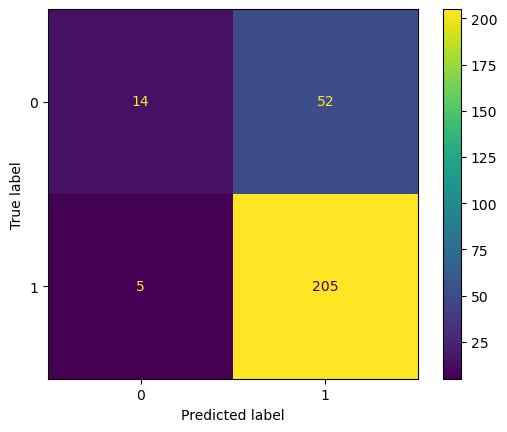

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logreg.classes_) 
disp.plot()
plt.show()

***
# Model Evaluation

True Negative:
- 14 non-bankrupt companies correctly classified
- 52 non-bankrupt companies were incorrectly classified as bankrupt

False Positive:
- 5 actual bankruptcies were incorrectly classified as non-bankrupt
- 205 actual bankrtupcies were correctly classfied as bankrupt

Class imbalance: while the model was pretty good at predicting bankruptcy cases, I know my dataset had far more instances of bankrutpcies than 'normal' cases.  It therefore makes sense it predicted many non-bankrupt cases were bankruptcies.



In [150]:
# Precision, recall, F1 Score

In [ ]:
cnf_matrix

In [152]:
tp = cnf_matrix[1, 1]
predicted_fraud = cnf_matrix[:, 1].sum()

precision = tp/predicted_fraud

print(f"Precision = {tp}/{predicted_fraud} = {round(precision*100, 2)}%")

Precision = 205/257 = 79.77%


In [153]:
tp = cnf_matrix[1, 1]
true_fraud = cnf_matrix[1, :].sum()

recall = tp/true_fraud

print(f"Recall = {tp}/{true_fraud} = {round(recall*100, 2)}%")

Recall = 205/210 = 97.62%


Confirming no difference with sklearn...

In [154]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.7976653696498055

In [155]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.9761904761904762

In [156]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.74      0.21      0.33        66
           1       0.80      0.98      0.88       210

    accuracy                           0.79       276
   macro avg       0.77      0.59      0.60       276
weighted avg       0.78      0.79      0.75       276



## I think the F-1 Score is the key here

I set out on this Capstone to predict bankruptcies.  According to this model, I can very accurately predict bankruptcies!  But, due to the nature of my data and how I chose to process it, I ended up with more bankruptcy cases than non-bankrupt cases, a class imbalance.  Therefore, it is likely a better test of the model to see if it can detect non-bankrupt companies, at which it did quite poorly.  Seperately, I'm very curious to look into the non-bankrupt cases to try and understand what the model picked up on.

Further, the F-1 score, a balance between precision and recall scores illuminates that the model is not perfect especially when it comes to the non-bankrupt cases.

I have two overall conclusions:
- With high class imbalance, your model becomes "a hammer that sees everything as a nail."  I'm curious what would happen with a more balanced dataset, or even a dataset where bankruptcy cases are a minority (as they are in the real world)
- Second, the model had littel to work with.  Due to (current) data limitations, I could only fed the model two types indicators of industry and three financial metrics.  These metrics have value, but professional financial analysis considers a much wider variety of indicators to predict future performance compared to what I offer here.

I will take these away as areas to improve in Sprint 3 where I hope to expand the dataset and apply more analysis techniques like clustering.

# End of Notebook
Rest is code to see the error I was running into, if curious...
***
***
***

In [74]:
from sklearn.model_selection import train_test_split

In [106]:
X = logistic_df_test.drop('filed_bankruptcy',axis=1)
y = logistic_df_test['filed_bankruptcy']

In [107]:
# Split our data into train and test sets
# arbitrarily chose the 3:1 train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42) #42.  Omens r good.

In [118]:
X_train.isna().sum()

SICIndustryGroup    0
SICPrimary          0
margin              0
asset_turnover      0
solvency            0
dtype: int64

In [114]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

